<a href="https://colab.research.google.com/github/ntolayd/CE888/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter=';')

Pre processing

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data  = data.drop(['duration'],axis=1)

In [10]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
data['y'].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

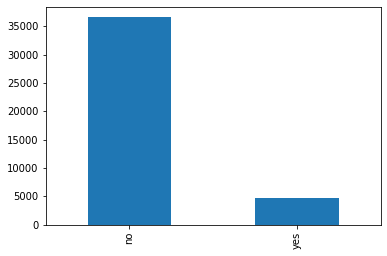

In [13]:
data['y'].value_counts().plot(kind='bar')

In [15]:
encoder = LabelEncoder()
data['y'] = encoder.fit_transform(data['y'])

In [17]:
df_dummies = pd.get_dummies(data)


Modelling

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop(['y'],axis=1), df_dummies['y'], test_size=0.2, random_state=50, stratify=data['y'])

In [34]:
y_train.value_counts(normalize=True)

0    0.887344
1    0.112656
Name: y, dtype: float64

In [35]:
y_test.value_counts(normalize=True)

0    0.887351
1    0.112649
Name: y, dtype: float64

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=3)
dummy_clf = DummyClassifier(strategy='stratified')

scores_rf= cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')
scores_dummy= cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring='f1')


In [37]:
scores_rf

array([0.21973094, 0.27433628, 0.19815668, 0.26280624, 0.1575179 ,
       0.23094688, 0.31670282, 0.24161074, 0.25112108, 0.23946785])

In [38]:
scores_dummy

array([0.10497981, 0.09152086, 0.13014608, 0.11827957, 0.12810458,
       0.10081744, 0.09536424, 0.13922356, 0.11829436, 0.11516854])

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': list(range(100,600,100)),
               'max_depth': list(range(2,9))}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid = param_grid , cv = 5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [48]:
rf_grid.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [49]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8)
scores_rf= cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')


In [50]:
scores_rf

array([0.27408994, 0.33954451, 0.25376344, 0.29487179, 0.26012793,
       0.3254818 , 0.39516129, 0.26781857, 0.28997868, 0.29288703])

In [51]:
final_model = clf.fit(X_train, y_train)

In [52]:
predictions = clf.predict(X_test)

In [56]:
feature_importance_df = pd.DataFrame({'importance':final_model.feature_importances_, 'features':X_train.columns})


In [61]:
feature_importance_df.sort_values(by='importance', ascending=False).head(3)

,importance,features
7,0.177365,euribor3m
8,0.147555,nr.employed
2,0.105910,pdays


In [62]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238

